# **MLSC Data Science & Machine Learning**
## **Nasa Hazardous Objects Detection**
## Abdallah Fekry Mohammed
### (Graduation Project)
---

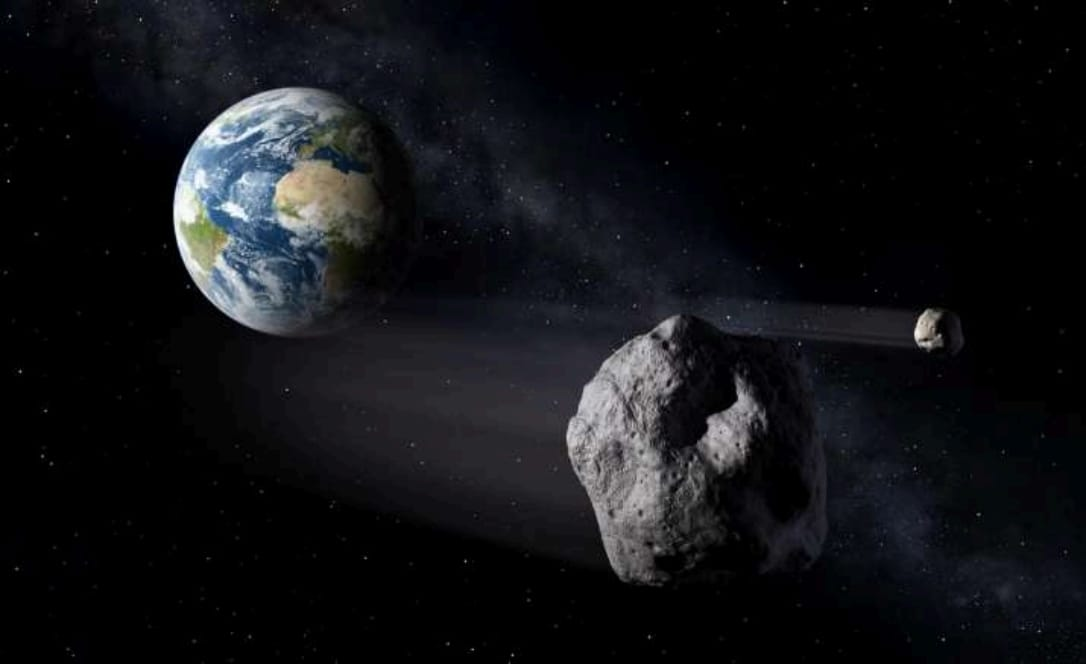

# Introduction
### The mission to detect the hazardous objects in these case the Recall is so important much more than the accuracy because we can to allow with misclassification the the non hazardous objects (FP) but predicting that the hazardous objects as they aren't (FN) that may makes disasters
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv(r"/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [6]:
len(df)

338199

## Resolving Null values

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [9]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


## Detecting Outliers

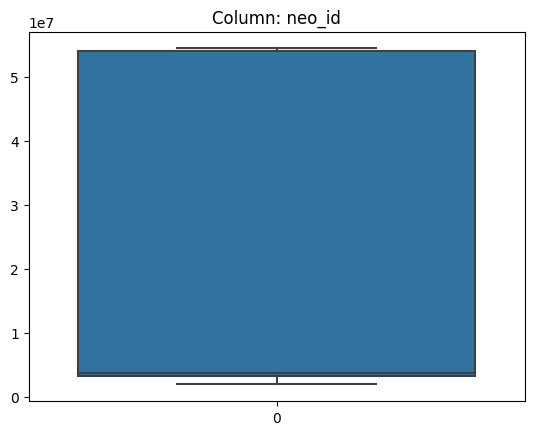

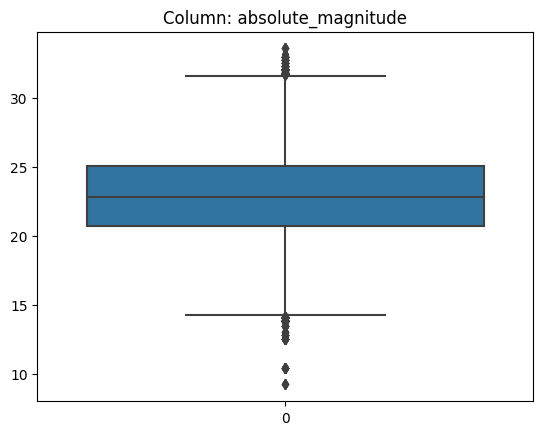

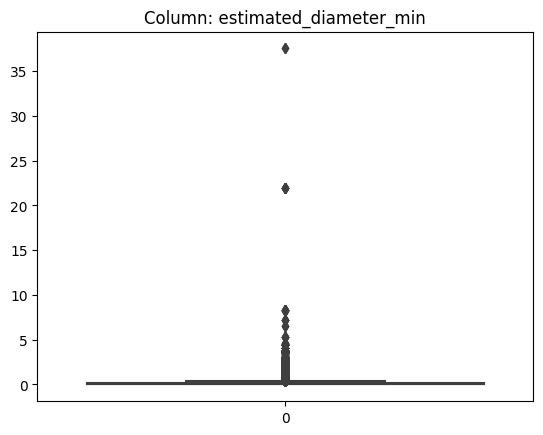

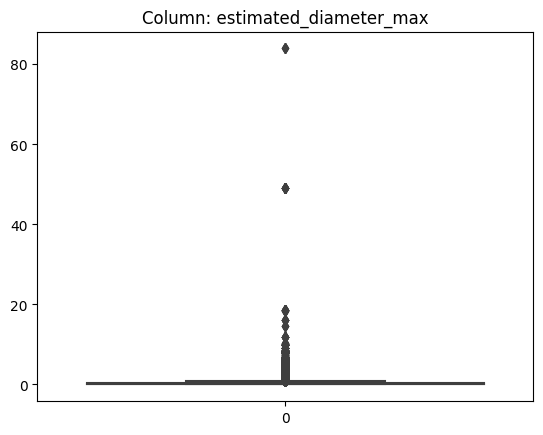

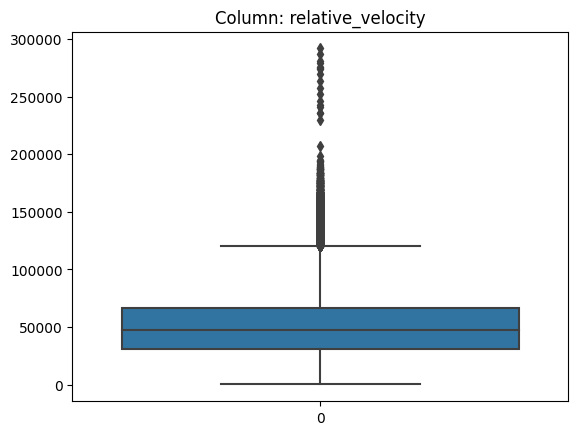

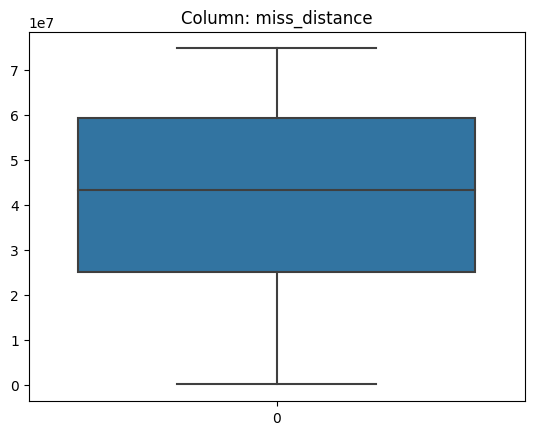

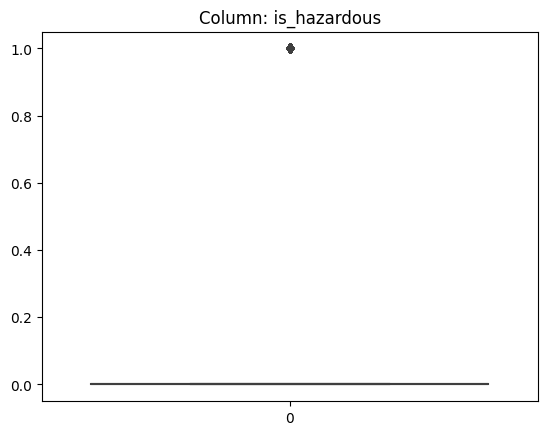

In [8]:
for c in df.columns:
    if df[c].dtype != 'object':
        sns.boxplot([df[c]])
        plt.title(f"Column: {c}")
        plt.show()

In [10]:
def resolve_outliers(df,c):
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df[c] < lower_bound) | (df[c] > upper_bound))]
    sns.boxplot([df[c]])
    plt.title(f"Cleaned Column: {c}")
    plt.show()
    return df

In [11]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

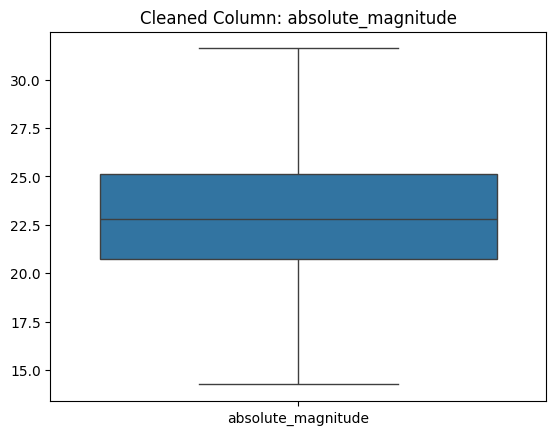

In [12]:
df = resolve_outliers(df, 'absolute_magnitude')

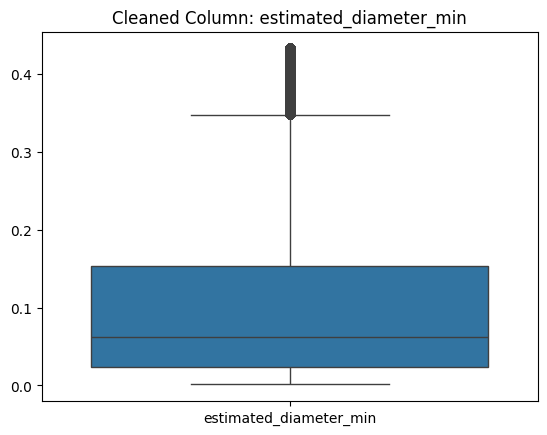

In [13]:
df = resolve_outliers(df, 'estimated_diameter_min')

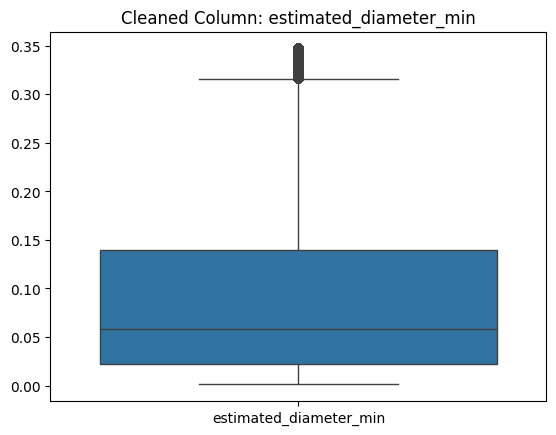

In [14]:
df = resolve_outliers(df, 'estimated_diameter_min') # resolve again

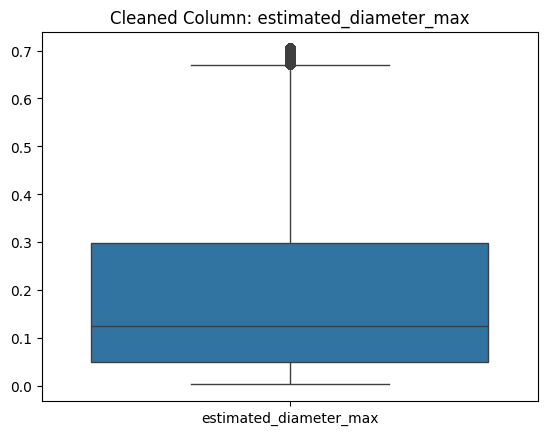

In [15]:
df = resolve_outliers(df, 'estimated_diameter_max')

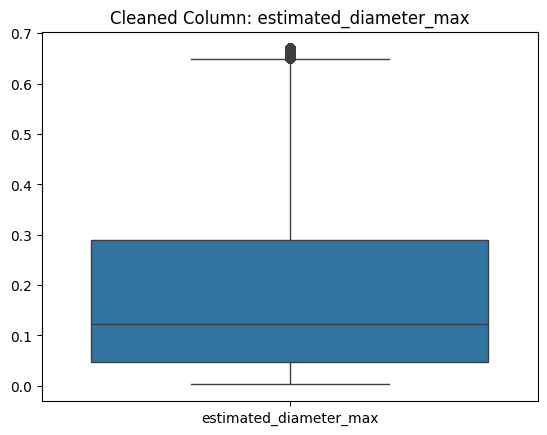

In [16]:
df = resolve_outliers(df, 'estimated_diameter_max')

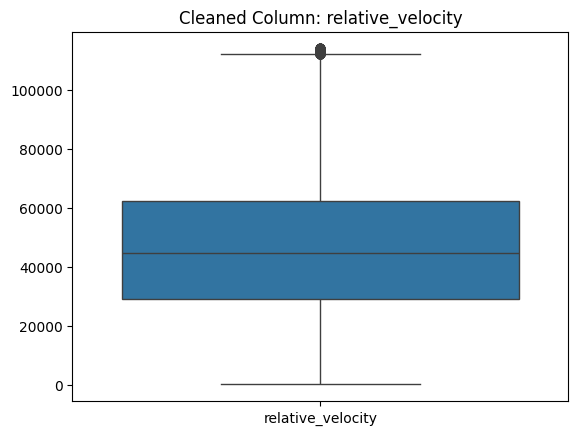

In [17]:
df = resolve_outliers(df, 'relative_velocity')

In [18]:
df.head(3)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [19]:
df.orbiting_body.unique()

array(['Earth'], dtype=object)

In [20]:
df.drop('neo_id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('orbiting_body', axis=1, inplace=True)
df.head(3)

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [21]:
df.is_hazardous = df.is_hazardous.astype(int)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0
5,25.00,0.026580,0.059435,47477.649832,4.290521e+07,0
6,21.50,0.133216,0.297879,57853.295346,2.727908e+07,1


<Axes: title={'center': 'Correlation Heatmap'}>

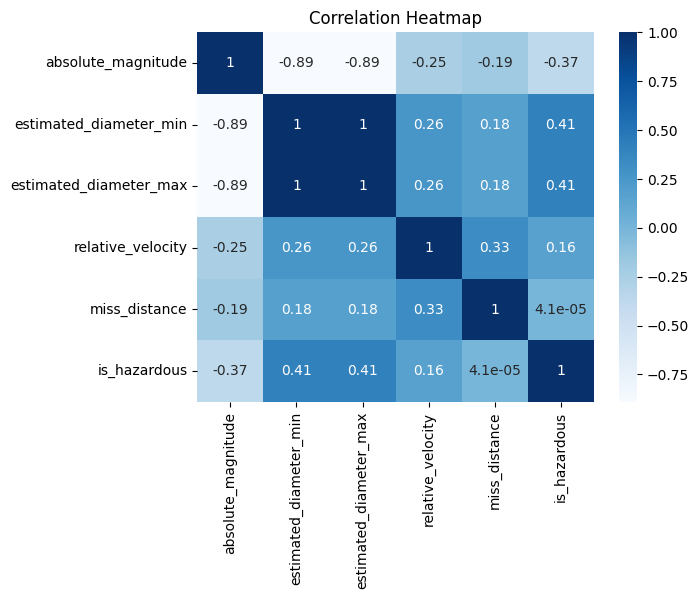

In [22]:
cr = df.corr()
plt.title("Correlation Heatmap")
sns.heatmap(cr, annot=True, cmap='Blues')

## Feature Engineering
1- features estimated_diameter_min and estimated_diameter_max are identical have correlation of value 1 and also -0.89 with feature absolute_magnitude, so i need to remove one of them to avoid overfitting

<Axes: title={'center': 'Correlation Heatmap'}>

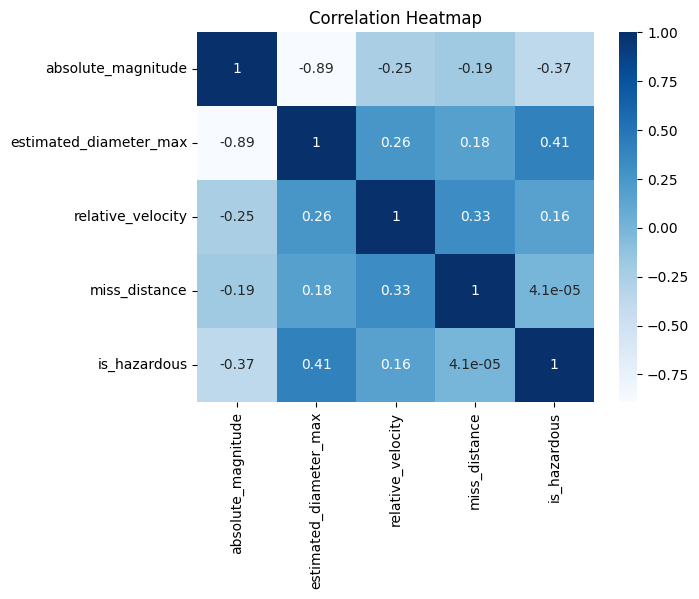

In [23]:
df.drop("estimated_diameter_min", axis=1, inplace=True)
cr = df.corr()
plt.title("Correlation Heatmap")
sns.heatmap(cr, annot=True, cmap='Blues')

<Axes: title={'center': 'Correlation Heatmap'}>

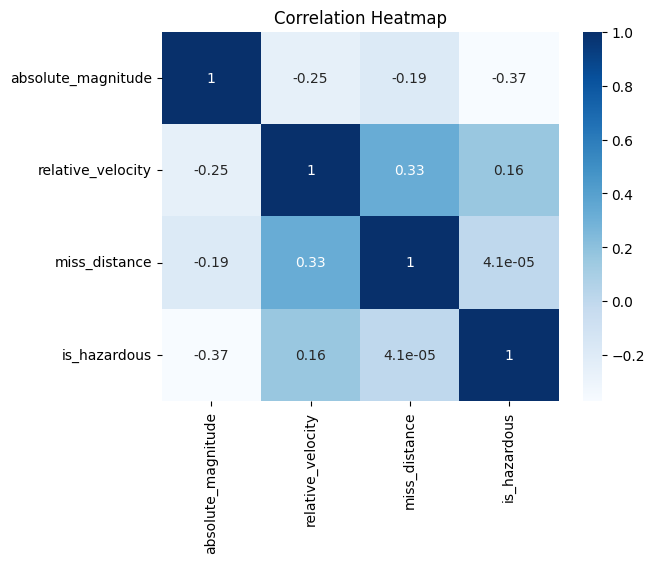

In [24]:
df.drop("estimated_diameter_max", axis=1, inplace=True)
cr = df.corr()
plt.title("Correlation Heatmap")
sns.heatmap(cr, annot=True, cmap='Blues')

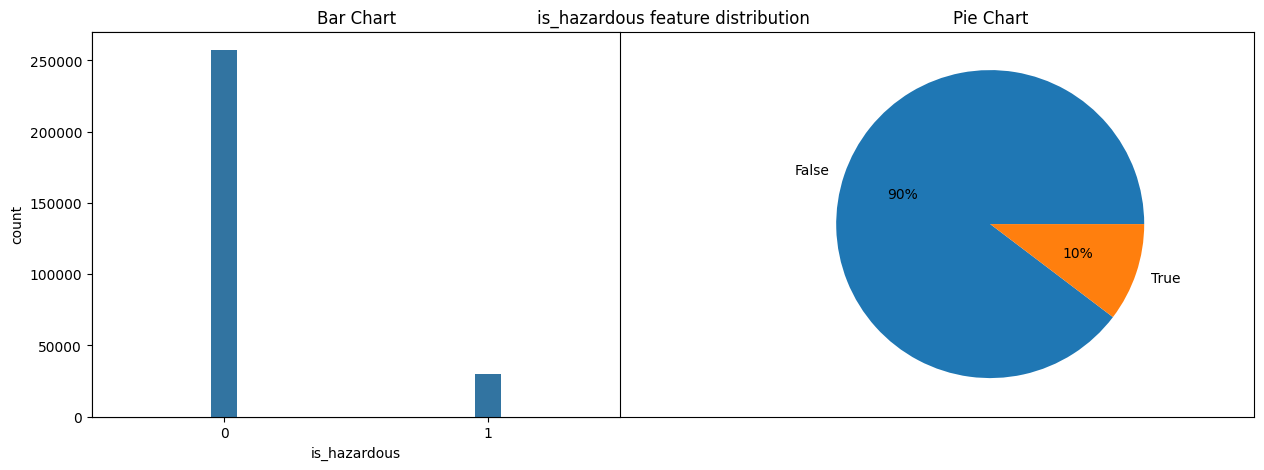

In [25]:
plt.figure(figsize=(15,5))
plt.title("is_hazardous feature distribution")
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.title("Bar Chart")
sns.barplot(df.is_hazardous.value_counts(), width=0.1)
plt.subplot(1,2,2)
plt.title("Pie Chart")
plt.pie(df.is_hazardous.value_counts(), labels=["False","True"], autopct="%.0f%%")
plt.show()

In [26]:
df.head()

,absolute_magnitude,relative_velocity,miss_distance,is_hazardous
2,21.45,24865.506798,6.720689e+07,0
3,20.63,78890.076805,3.039644e+07,0
4,22.70,56036.519484,6.311863e+07,0
5,25.00,47477.649832,4.290521e+07,0
6,21.50,57853.295346,2.727908e+07,1


In [34]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=13)
print(x_train.shape, y_train.shape,
      x_test.shape, y_test.shape, sep='\n')

(229555, 3)
(229555,)
(57389, 3)
(57389,)


In [89]:
len(x)

286944

## Using Stratified K-fold Cross-validation

In [90]:
model = LogisticRegression()

In [91]:
skf = StratifiedKFold(n_splits=1000)
score = cross_val_score(model, x, y, cv=skf)

In [93]:
score

array([0.89547038, 0.88850174, 0.88501742, 0.88850174, 0.88850174,
       0.88850174, 0.8815331 , 0.8815331 , 0.91289199, 0.88501742,
       0.90592334, 0.89547038, 0.86759582, 0.8989547 , 0.87108014,
       0.90243902, 0.87108014, 0.88850174, 0.86062718, 0.87108014,
       0.88501742, 0.87804878, 0.8815331 , 0.8641115 , 0.89198606,
       0.89198606, 0.86759582, 0.89198606, 0.88501742, 0.8815331 ,
       0.8815331 , 0.90592334, 0.8815331 , 0.87804878, 0.88850174,
       0.87456446, 0.8815331 , 0.8815331 , 0.90592334, 0.88850174,
       0.87108014, 0.87804878, 0.87804878, 0.88850174, 0.89198606,
       0.87804878, 0.8815331 , 0.8815331 , 0.89198606, 0.87108014,
       0.87456446, 0.8815331 , 0.87108014, 0.90243902, 0.90243902,
       0.88501742, 0.87108014, 0.87456446, 0.89547038, 0.89198606,
       0.88501742, 0.89547038, 0.87108014, 0.87108014, 0.8815331 ,
       0.90592334, 0.89198606, 0.90243902, 0.8989547 , 0.89198606,
       0.87804878, 0.88850174, 0.87804878, 0.90592334, 0.88850

In [95]:
np.mean(score)

0.8903989181550157

In [87]:
train_accuracy = accuracy_score(y_train, yp_train)
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Training Accuracy:", round(train_accuracy*100,2))
print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Training Accuracy: 89.08

Testing Accuracy: 88.94

Testing Recall: 11.37


<Axes: >

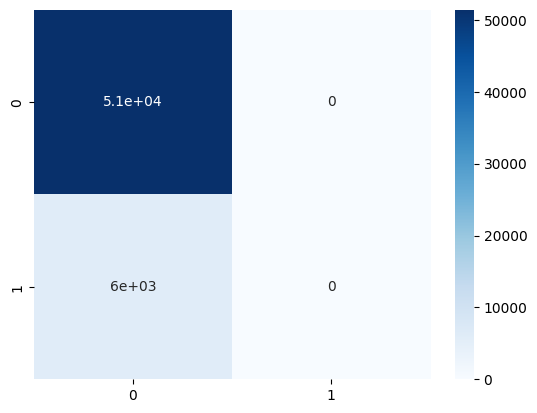

In [81]:
cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, cmap='Blues')

### Refused

---

## Using Support Vector Machine

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [34]:
yp = svc.predict(x_test)
yp_train =svc.predict(x_train)

In [35]:
train_accuracy = accuracy_score(y_train, yp_train)
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Training Accuracy:", round(train_accuracy*100,2))
print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Training Accuracy: 90.64
Testing Accuracy: 90.57
Testing Recall: 13.55


<Axes: >

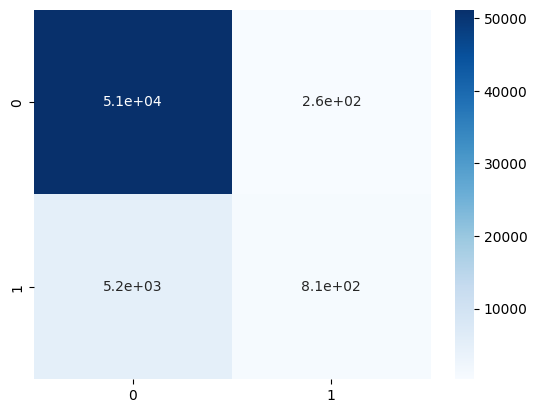

In [36]:
cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, cmap='Blues')

### Refused

---

## Visualize data in 2D view

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(x)
x_2d = pca.transform(x)
x_2d.shape


(286944, 2)

In [38]:
y[0]

0

In [41]:
c1x = []
c1y = []
c2x = []
c2y = []
for i in range(len(x_2d)):
    if y[i] == 0:
        c1x.append(x_2d[i][0])
        c1y.append(x_2d[i][1])
    else:
        c2x.append(x_2d[i][0])
        c2y.append(x_2d[i][1])

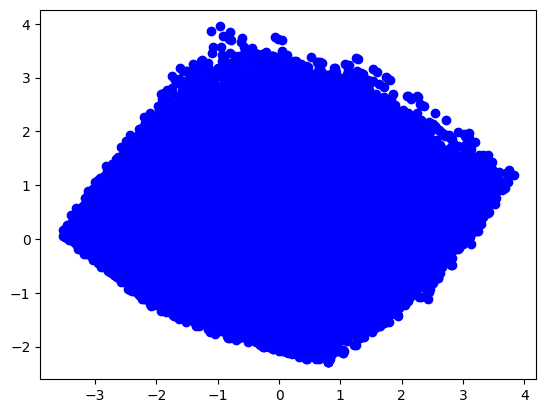

In [45]:
plt.scatter(c1x,c1y, color='blue')

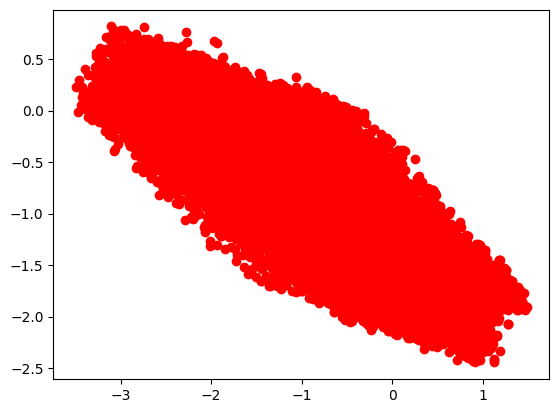

In [46]:
plt.scatter(c2x,c2y, color='red')

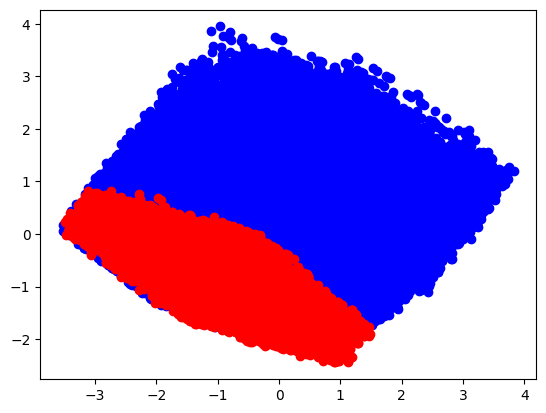

In [47]:
plt.scatter(c1x,c1y, color='blue')
plt.scatter(c2x,c2y, color='red')

## The data is overlapped so it can't be lineary separatable, So decision trees and RF will be more suitable here

---

## Using Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

In [ ]:
score.mean()

In [29]:
yp = tree.predict(x_test)

In [30]:
# train_accuracy = accuracy_score(y_train, yp_train)
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

# print("Training Accuracy:", round(train_accuracy*100,2))
print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Testing Accuracy: 91.16
Testing Recall: 57.5


## Refused: but i think i made progress
___

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [65]:
yp = rf.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Testing Accuracy: 92.64
Testing Recall: 47.05


## Okay, now we are going back, not forward 😂😂

---

## Using Oversamplig technique with Decision Tree

In [41]:
smote = SMOTE(random_state=13)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [44]:
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
0    205892
1     23663
Name: count, dtype: int64

After SMOTE:
0    205892
1    205892
Name: count, dtype: int64


In [45]:
tree = DecisionTreeClassifier()
tree.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [46]:
yp = tree.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Testing Accuracy: 91.26
Testing Recall: 64.99


### Still Refused, i need a little bit more Recall

---

## Using Oversampling with Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [50]:
yp = rf.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Testing Accuracy: 89.14
Testing Recall: 80.63


### Thats nice, but can get better
---

## Using Downsampling and Oversamplig with Random Forest

In [55]:
df.is_hazardous.value_counts()

is_hazardous
0    257319
1     29625
Name: count, dtype: int64

In [67]:
df2 = df[df['is_hazardous'] == 0].sample(n=15000)
df2 = df2._append(df[df['is_hazardous'] == 1], ignore_index=True)

In [69]:
df2.head()

,absolute_magnitude,relative_velocity,miss_distance,is_hazardous
0,24.11,22940.122002,1.266460e+07,0
1,21.03,104860.068616,7.370340e+07,0
2,25.60,29848.370550,3.298437e+06,0
3,23.09,85601.607547,7.250867e+07,0
4,24.89,40959.615302,3.919614e+07,0


In [70]:
df2.tail()

,absolute_magnitude,relative_velocity,miss_distance,is_hazardous
44620,21.40,76913.014352,1.188187e+07,1
44621,21.38,89118.566309,3.766458e+07,1
44622,19.96,82457.667589,6.752365e+07,1
44623,20.43,54747.600249,1.067043e+07,1
44624,20.43,54747.577829,1.067038e+07,1


In [71]:
df2['is_hazardous'].value_counts()

is_hazardous
1    29625
0    15000
Name: count, dtype: int64

In [81]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [82]:
x = scaler.transform(x)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=13)
print(x_train.shape, y_train.shape,
      x_test.shape, y_test.shape, sep='\n')

(35700, 3)
(35700,)
(8925, 3)
(8925,)


In [84]:
smote = SMOTE(random_state=13)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [85]:
rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [86]:
yp = rf.predict(x_test)

In [87]:
accuracy = accuracy_score(y_test, yp)
recall = recall_score(y_test, yp)

print("Testing Accuracy:", round(accuracy*100,2))
print("Testing Recall:", round(recall*100,2))

Testing Accuracy: 91.69
Testing Recall: 97.45


<Axes: >

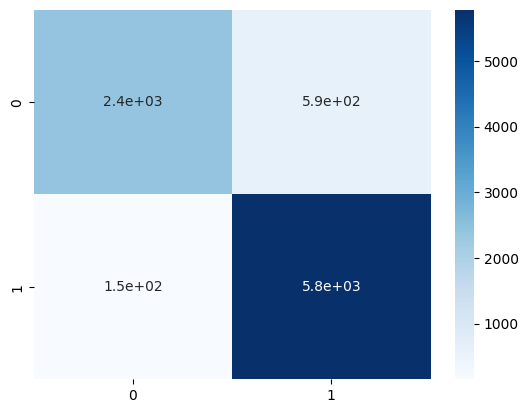

In [88]:
cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, cmap='Blues')

### Accepted

---
## **Conclusion**
### We have a winner: by removing the outliers, missing data, correlated features in the cleaning phase, and by using the oversamplig and downsampling teqniques together with Random Forest Model it gives the best accuracy with Testing Recall 97.5% and total test accuracy 91.6%.
### These model is capable of identify the hazardous objects by 97.5% wich is that main task and these means that it is doing its job perfectly